# Benchmarking Supervised algorithms on a large repository

In [112]:
from pmlb import fetch_data, classification_dataset_names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
import math

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

import multiprocessing as mp
from functools import partial

import pickle
import seaborn

### Supervised Learning algorithms used: 

In [2]:
def decision_tree(X_train, y_train, X_test, y_test):

    dt = tree.DecisionTreeClassifier(random_state=42)
    dt = dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    acc_scores['dt'] = acc_dt

def random_forest(X_train, y_train, X_test, y_test):

    clf = RandomForestClassifier(random_state=42)
    y_pred = (clf.fit(X_train, y_train)).predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    acc_scores['rf'] = acc
    
def ext_trees(X_train, y_train, X_test, y_test):    

    clf = ExtraTreesClassifier(random_state=42)
    y_pred = (clf.fit(X_train, y_train)).predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    acc_scores['ext_trees'] = acc

def gb_classifier(X_train, y_train, X_test, y_test):
    
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=1.0, random_state=42)
    y_pred = (clf.fit(X_train, y_train)).predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_scores['gb'] = acc
    
def ada_classifier(X_train, y_train, X_test, y_test):
    
    clf = AdaBoostClassifier(n_estimators=100, random_state=42)
    y_pred = (clf.fit(X_train, y_train)).predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_scores['ada'] = acc
    
def xgb(X_train, y_train, X_test, y_test):

    clf = XGBClassifier(n_estimators=100, random_state=42)
    y_pred = (clf.fit(X_train, y_train)).predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_scores['xgb'] = acc

In [8]:
# Remove the datasets 'kddcup','poker','mnist' because of long run times
new_ds = [x for x in classification_dataset_names if x not in ['kddcup','poker','mnist']]

### Fetch each dataset from the Penn repository (163 datasets) and run the above different algorithms on the data.

In [111]:
def get_score(dataset):

    X, y = fetch_data(dataset, return_X_y=True, local_cache_dir='./')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    decision_tree(X_train, y_train, X_test, y_test)
    random_forest(X_train, y_train, X_test, y_test)
    ext_trees(X_train, y_train, X_test, y_test)
    gb_classifier(X_train, y_train, X_test, y_test)
    ada_classifier(X_train, y_train, X_test, y_test)
    xgb(X_train, y_train, X_test, y_test)
    
    return dataset, acc_scores

### Use multiprocessing to run for 163 datasets.

In [24]:
acc_scores = {}
all_scores = {}


PROCESSES = 8
print 'Creating pool with %d processes\n' % PROCESSES
pool = mp.Pool(PROCESSES)
for ds, acc in pool.imap_unordered(partial(get_score), new_ds):
    all_scores[ds] = acc
    #print ds
    #print len(all_scores)

Creating pool with 8 processes

GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1
1
GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM-2_001
2
GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM-2_001
3
GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1
4
GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1
5
agaricus-lepiota
6
allbp
7
Hill_Valley_without_noise
8
allhypo
9
Hill_Valley_with_noise
10
allhyper
11
analcatdata_aids
12
analcatdata_asbestos
13
analcatdata_bankruptcy
14
analcatdata_boxing1
15
analcatdata_boxing2
16
analcatdata_creditscore
17
analcatdata_cyyoung8092
18
analcatdata_cyyoung9302
19
analcatdata_fraud
20
analcatdata_authorship
21
analcatdata_germangss
22
analcatdata_dmft
23
allrep
24
analcatdata_japansolvent
25
analcatdata_happiness
26
analcatdata_lawsuit
27
appendicitis
28
australian
29
backache
30
auto
31
balance-scale
32
biomed
33
breast
34
banana
35
breast-cancer
36
breast-w
37
breast-cancer-wisconsin
38
buggyCrx
39
bupa
40
calendarDOW
41
ann-thyroid
42
cars
43
cars1
44
car
45
adu

In [87]:
pickle.dump(all_scores, open("scores.p", "wb"))
#load_scores = pickle.load( open("scores.p", "rb"))

### Compare accuracy scores of each algorithm with the other 5 and create a matrix with the histogram of winners.

In [127]:
compare_mat = np.zeros((6,6))
methods = ['dt', 'rf', 'ext_trees', 'gb', 'ada', 'xgb']

for i in range(6):
    for j in range(6):
        for ds in new_ds:
            if all_scores[ds][methods[i]] > all_scores[ds][methods[j]]:
                compare_mat[i][j] += 1

compare_mat = compare_mat/len(all_scores)
print compare_mat

[[ 0.          0.28834356  0.30674847  0.34355828  0.51533742  0.1595092 ]
 [ 0.60122699  0.          0.42331288  0.46625767  0.62576687  0.25766871]
 [ 0.60122699  0.45398773  0.          0.46625767  0.61349693  0.28220859]
 [ 0.57055215  0.4601227   0.43558282  0.          0.56441718  0.2392638 ]
 [ 0.39877301  0.31288344  0.33742331  0.26380368  0.          0.11042945]
 [ 0.72392638  0.58895706  0.63803681  0.64417178  0.71165644  0.        ]]


### Plot the comparison.

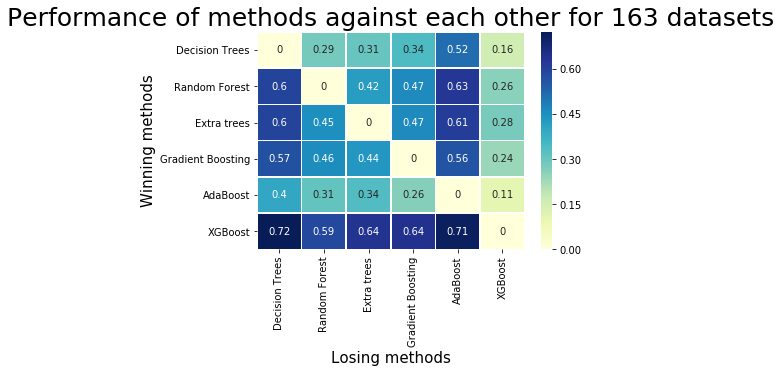

In [135]:
methods_full = ['Decision Trees', 'Random Forest', 'Extra trees', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
seaborn.heatmap(compare_mat, xticklabels=methods_full, yticklabels=methods_full, annot=True, linewidths=.5, cmap="YlGnBu");
plt.xlabel('Losing methods', fontsize=15)
plt.ylabel('Winning methods', fontsize=15)
plt.title('Performance of methods against each other for 163 datasets', fontsize=25);

In [138]:
fig = ax.get_figure()
fig.savefig('result.png', bbox_inches="tight")